<a href="https://colab.research.google.com/github/piranfar/docking-Analyze/blob/main/Dockinganalyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import re
from google.colab import files

# Step 1: Upload the AutoDock DLG file
print("📤 Please upload your AutoDock results file (.dlg):")
uploaded = files.upload()

# Get the filename
dlg_filename = list(uploaded.keys())[0]

# Step 2: Convert the DLG file into readable text format
print("📄 Converting DLG file to text format...")
converted_filename = "converted_results.txt"

with open(dlg_filename, "r", encoding="utf-8", errors="ignore") as infile, open(converted_filename, "w", encoding="utf-8") as outfile:
    for line in infile:
        outfile.write(line)  # Write content to a new text file

print("✅ Conversion complete. Now extracting binding energy values...")

# Step 3: Extract Binding Energies with Regex
binding_energies = []

pattern = r"Estimated Free Energy of Binding\s+=\s+(-?\d+\.\d+)\s+kcal/mol"

with open(converted_filename, "r", encoding="utf-8") as file:
    for line in file:
        match = re.search(pattern, line)
        if match:
            binding_energies.append(float(match.group(1)))  # Extract the numeric value

# Step 4: Store results in a DataFrame
df_binding_energies = pd.DataFrame({
    "Pose": list(range(1, len(binding_energies) + 1)),
    "Binding Energy (kcal/mol)": binding_energies
})

# Step 5: Display the extracted data
if df_binding_energies.empty:
    print("⚠️ No binding energies were extracted. Please check your DLG file format.")
else:
    from IPython.display import display
    display(df_binding_energies)

    # Save as CSV
    csv_filename = "binding_energies.csv"
    df_binding_energies.to_csv(csv_filename, index=False)
    print(f"✅ Results saved as '{csv_filename}'. You can download it below:")

    # Provide download link
    files.download(csv_filename)


📤 Please upload your AutoDock results file (.dlg):


Saving results.dlg to results (1).dlg
📄 Converting DLG file to text format...
✅ Conversion complete. Now extracting binding energy values...


,Pose,Binding Energy (kcal/mol)
0,1,-5.67
1,2,-4.45
2,3,-5.50
3,4,-3.99
4,5,-5.93
...,...,...
133,134,-3.99
134,135,-3.97
135,136,-3.95
136,137,-3.30


✅ Results saved as 'binding_energies.csv'. You can download it below:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

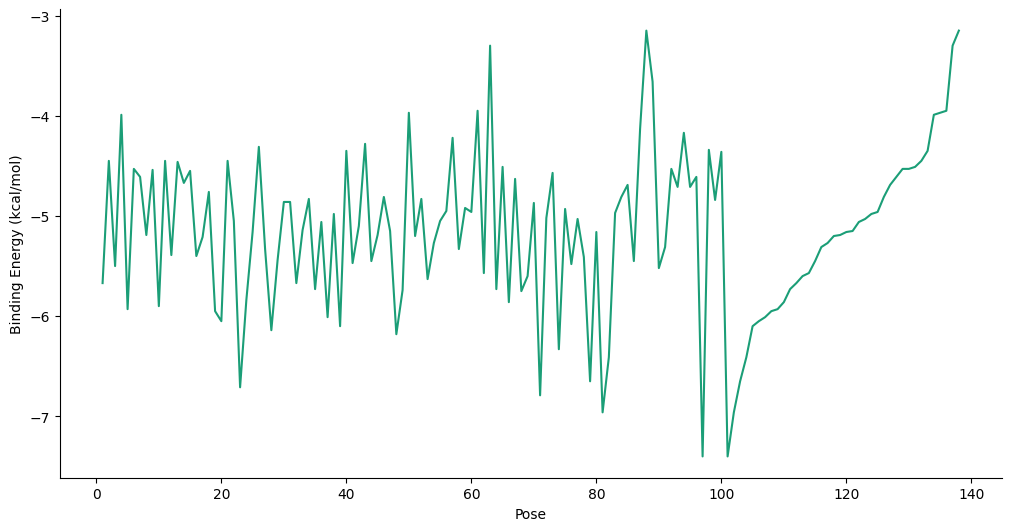

In [5]:
# @title Pose vs Binding Energy (kcal/mol)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Pose']
  ys = series['Binding Energy (kcal/mol)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_binding_energies.sort_values('Pose', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Pose')
_ = plt.ylabel('Binding Energy (kcal/mol)')